In [7]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf

# Load your uploaded dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")  # adjust if needed

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nOverall Survival Rate:", df["Survived"].mean())



Dataset Shape: (891, 12)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Overall Survival Rate: 0.3838383838383838


In [9]:
# Drop Cabin (too many missing)
df = df.drop(columns=["Cabin"])

# Fill Embarked with mode (most frequent port)
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Fill Age with median
df["Age"] = df["Age"].fillna(df["Age"].median())

print(df.isnull().sum())



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [10]:
df.groupby("Sex")["Age"].median()


,Age
Sex,
female,28.0
male,28.0


In [12]:
df["Age"] = df.groupby("Sex")["Age"].transform(
    lambda x: x.fillna(x.median())
)


In [13]:
# Fill missing age
df["Age"] = df["Age"].fillna(df["Age"].median())

# Family Size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Alone Indicator
df["Alone"] = (df["FamilySize"] == 1).astype(int)

# Social Class Proxy
df["SocialClass"] = df["Pclass"].astype("category")

# Age Groups
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[0, 12, 18, 35, 60, 100],
    labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"]
)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Alone,SocialClass,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,3,YoungAdult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,3,YoungAdult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,1,YoungAdult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,3,YoungAdult


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


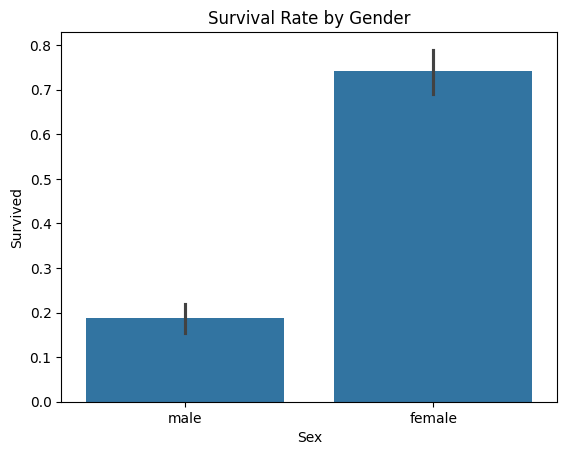

In [14]:
print(df.groupby("Sex")["Survived"].mean())

sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()


Women survived much more than men. About 74% of women survived, but only 19% of men survived. This shows a strong connection between gender and survival.

But this does not mean gender alone caused survival. This result only shows a relationship, not the exact reason. To understand the real reason, we need to check other factors like age, ticket class, and family size.

It is possible that women survived more because of evacuation rules like “women and children first,” not because of biological reasons.

/tmp/ipython-input-1644835405.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("AgeGroup")["Survived"].mean())


AgeGroup
Child         0.579710
Teen          0.428571
YoungAdult    0.353271
Adult         0.400000
Senior        0.227273
Name: Survived, dtype: float64


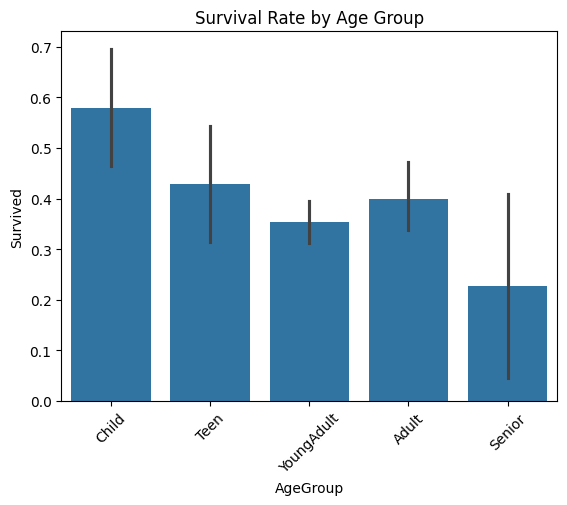

In [15]:
print(df.groupby("AgeGroup")["Survived"].mean())

sns.barplot(x="AgeGroup", y="Survived", data=df)
plt.title("Survival Rate by Age Group")
plt.xticks(rotation=45)
plt.show()


Children had the highest survival rate (about 58%). Seniors had the lowest survival rate (about 23%). Teenagers and adults were in the middle, around 35–43%.

This shows that younger passengers were more likely to survive, especially children. Older passengers had a lower chance of survival.

This supports the idea that rescue priority was likely given to children first. Age clearly affected survival chances.

/tmp/ipython-input-720108653.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("SocialClass")["Survived"].mean())


SocialClass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


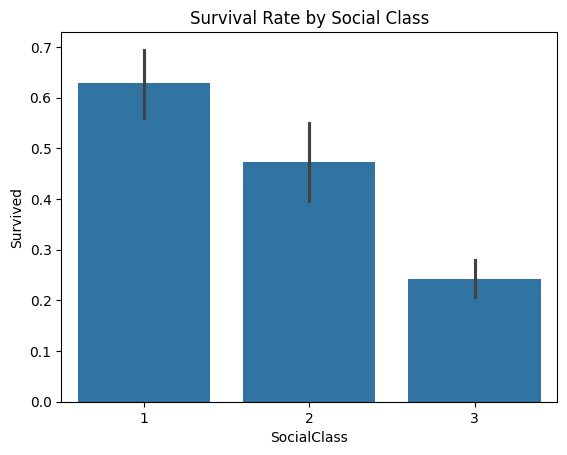

In [16]:
print(df.groupby("SocialClass")["Survived"].mean())

sns.barplot(x="SocialClass", y="Survived", data=df)
plt.title("Survival Rate by Social Class")
plt.show()


Passengers in 1st class had the highest survival rate (about 63%).
Passengers in 2nd class had a medium survival rate (about 47%).
Passengers in 3rd class had the lowest survival rate (about 24%).

This shows that social class strongly affected survival. People in higher class had a much better chance of surviving compared to people in lower class.

So survival was not only about gender or age — social status also played an important role.

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


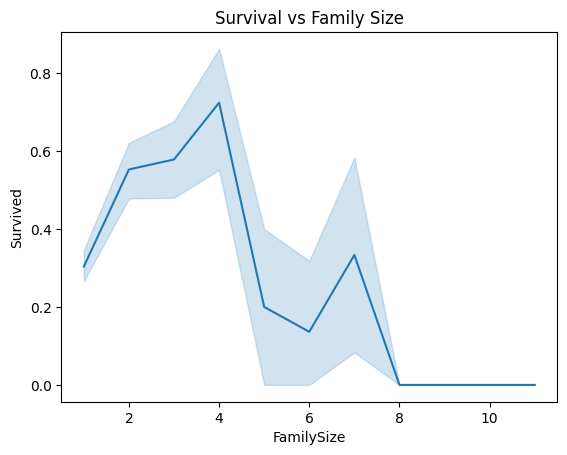

In [17]:
print(df.groupby("FamilySize")["Survived"].mean())

sns.lineplot(x="FamilySize", y="Survived", data=df)
plt.title("Survival vs Family Size")
plt.show()


Passengers traveling alone (family size 1) had a lower survival rate (about 30%).

Passengers with small families (2–4 members) had the highest survival rate. Survival was highest around family size 4 (about 72%).

Passengers with very large families (5 or more) had low survival rates. Very large families (8 or more) had almost no survival.

This shows that being with a small family helped survival, but very large families had difficulty escaping.

In [18]:
pd.crosstab(df["Sex"], df["Pclass"])


Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [19]:
df.groupby("Sex")["Age"].mean()


,Age
Sex,
female,27.929936
male,30.140676


In [20]:
cont_table = pd.crosstab(df["Sex"], df["Survived"])
chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-square p-value (Sex vs Survival):", p)


Chi-square p-value (Sex vs Survival): 1.1973570627755645e-58


Women were present in all three classes, but more men were in 3rd class compared to women. So part of the survival difference could be related to class distribution.

The average age of women (about 28 years) and men (about 30 years) is not very different. So age difference between men and women is small and probably not the main reason for survival difference.

The chi-square test gives a very small p-value (almost zero). This means gender and survival are strongly related. The difference is not due to random chance.

In [21]:
df["Sex_Female"] = (df["Sex"] == "female").astype(int)


In [22]:
model = smf.logit(
    "Survived ~ Sex_Female + Age + C(SocialClass) + FamilySize",
    data=df
).fit()

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.444911
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sat, 14 Feb 2026   Pseudo R-squ.:                  0.3319
Time:                        14:12:25   Log-Likelihood:                -396.42
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.356e-83
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.4646      0.371      3.950      0.000       0.738       2.191
C(

Coefficient = +2.78

p-value = 0.000 (very significant)

This means:

Even after controlling for age, social class, and family size, women still had much higher survival chances.

If we convert to odds ratio:

exp(2.78) ≈ 16

Women had about 16 times higher survival odds than men, after adjusting for other factors.

In [23]:
interaction_model = smf.logit(
    "Survived ~ Sex_Female * C(SocialClass) + Age + FamilySize",
    data=df
).fit()

print(interaction_model.summary())


Optimization terminated successfully.
         Current function value: 0.428303
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Sat, 14 Feb 2026   Pseudo R-squ.:                  0.3568
Time:                        14:13:24   Log-Likelihood:                -381.62
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.257e-87
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.4373      0.400      3.593     

In [24]:
import numpy as np

params = interaction_model.params
odds_ratios = np.exp(params)

print("Odds Ratios:\n", odds_ratios)


Odds Ratios:
 Intercept                          4.209273
C(SocialClass)[T.2]                0.209014
C(SocialClass)[T.3]                0.160636
Sex_Female                        56.383832
Sex_Female:C(SocialClass)[T.2]     1.441095
Sex_Female:C(SocialClass)[T.3]     0.125006
Age                                0.956935
FamilySize                         0.817624
dtype: float64


Women had much higher survival chances than men.

Even after controlling for age and family size, gender remains a very strong predictor.

However, the survival advantage of women was strongest in 1st class and weaker in 3rd class.

This shows survival was influenced by both:

Gender (very strong effect)

Social class (important effect)

Interaction between gender and class

So the survival difference was not biological. It was influenced by social structure and evacuation priority.

Women, especially in higher classes, were more likely to be saved.

Women survived more mainly because of social and evacuation priority (like “women and children first”), not because of biological reasons. Survival was influenced by gender, social class, and their interaction — but gender remained the strongest factor.